# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
print(f'Beginning Data Retrieval')
print(f'--------------------------')

#creating counters for each column in new dataframes
city_names = []
lat_list = []
lng_list = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#weather check on each city using API calls
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        time.sleep(1)
        #pprint(response) - (to see the data to pull)
        city_names.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except(KeyError):
        print("City not found")
print(f'------------------------')
print(f'Data Retrieval Complete')
print(f'------------------------')

Beginning Data Retrieval
--------------------------
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#dataframe for above information
weather_df = pd.DataFrame({"City": city_names,
                          "Lat": lat_list,
                          "Lng": lng_list,
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})

#display dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.92,114.08,1.17,92,90,6.31,RU,1603730732
1,Kismayo,-0.36,42.55,80.29,80,55,13.47,SO,1603730683
2,Bluff,-46.60,168.33,44.19,85,20,2.98,NZ,1603730734
3,Mataura,-46.19,168.86,36.21,94,28,1.90,NZ,1603730735
4,East London,-33.02,27.91,62.60,93,90,16.11,ZA,1603730737
...,...,...,...,...,...,...,...,...,...
572,Chaoyang,41.57,120.46,47.53,45,0,8.16,CN,1603731440
573,Cockburn Town,21.46,-71.14,83.46,79,69,19.71,TC,1603731175
574,Zhigansk,66.77,123.37,-2.11,91,100,12.19,RU,1603731443
575,Slobodskoy,58.73,50.18,28.71,93,98,6.02,RU,1603731444


In [10]:
#exporting the above dataframe into a csv file
weather_df.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
#no humidity over 100 - skipping step
weather_df.Humidity.values

array([ 92,  80,  85,  94,  93,  68,  84,  87, 100,  83,  94,  74,  74,
        16,  71,  62,  76,  83,  43,  78,  33,  83,  76,  74,  75,  73,
        79,  87,  87,  88,  83,  71,  74,  68,  82,  73, 100,  74,  93,
        77,  64,  78,  49,  12,  20,  69,   9,  36,  81,  54,  93,  70,
        64,  87,  84,  74,  86,  82,  27,  77,  67,  62,  69,  34,  88,
        65,  85,  48,  28,  56,  85,  62,   9,  95,  74,  92,  88,  78,
        58,  86,  63,  26,  82,  77,  15,  96,  24, 100,  89,  42,  75,
        82,  91,  80,  88,  83,  47,  91, 100,  48,  64,  71,  93, 100,
        66,  15,  57,  52,  62, 100,  80,  87,  87,  84,  93,  94,  51,
        59,  92,  69,  79,  86,  65,  62,  62, 100,  96,  68,  81,  50,
        65,  94,  93,  81,  62,  57,  72, 100,  87,  85,  74,  65,  82,
        78,  79,  82,  52,  95,  47,  84,  98,  25,  89,  89,  71,  82,
        44,  40, 100,  66,  73,  78,  10,  92,  69,  57, 100,  65,  73,
        94,  70,  69,  86, 100,  76,  36,  92,  72,  79,  92,  9

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

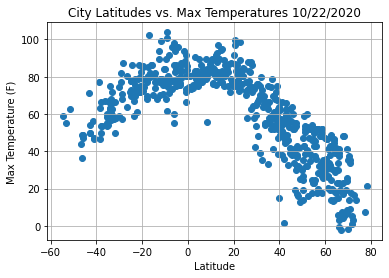

In [12]:
#scatter plot for latitude vs. temp
plt.scatter(weather_df['Lat'], weather_df['Max Temp'])

#set labels and add grid
plt.title("City Latitudes vs. Max Temperatures 10/22/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#saving into a png file
plt.savefig("output_data/png files/City Lat vs. Max Temp.png")

## Latitude vs. Humidity Plot

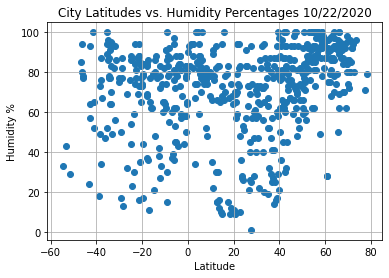

In [13]:
#scatter plot for latitude vs. humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'])

#set labels and add grid
plt.title("City Latitudes vs. Humidity Percentages 10/22/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

#saving into a png file
plt.savefig("output_data/png files/City Lat vs. Humidity.png")

## Latitude vs. Cloudiness Plot

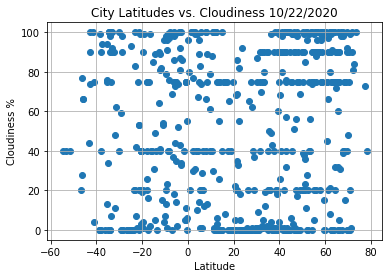

In [14]:
#scatter plot for latitude vs. cloudiness
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'])

#set labels and add grid
plt.title("City Latitudes vs. Cloudiness 10/22/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

#saving into a png file
plt.savefig("output_data/png files/City Lat vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

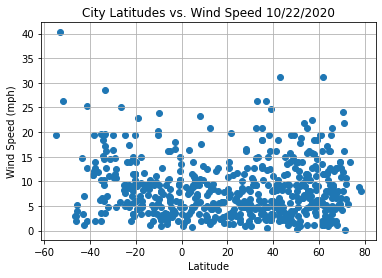

In [15]:
#scatter plot for latitude vs. wind speed
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'])

#set labels and add grid
plt.title("City Latitudes vs. Wind Speed 10/22/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#saving into a png file
plt.savefig("output_data/png files/City Lat vs. Wind Speed.png")

## Linear Regression

In [16]:
#northern hemisphere dataframe
north_hem = weather_df.loc[weather_df['Lat'] >= 0]

#test run
north_hem

#southern hemisphere dataframe
south_hem = weather_df.loc[weather_df['Lat'] < 0]

#test run
south_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kismayo,-0.36,42.55,80.29,80,55,13.47,SO,1603730683
2,Bluff,-46.60,168.33,44.19,85,20,2.98,NZ,1603730734
3,Mataura,-46.19,168.86,36.21,94,28,1.90,NZ,1603730735
4,East London,-33.02,27.91,62.60,93,90,16.11,ZA,1603730737
5,Kavieng,-2.57,150.80,82.96,68,86,5.93,PG,1603730738
...,...,...,...,...,...,...,...,...,...
558,Dunedin,-45.87,170.50,48.99,77,66,5.19,NZ,1603731424
561,Luanda,-8.84,13.23,80.60,78,40,8.05,AO,1603731428
567,Geraldton,-28.77,114.60,57.20,87,0,4.70,AU,1603731435
568,Carutapera,-1.20,-46.02,88.65,58,5,9.53,BR,1603731436


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7458690557565367


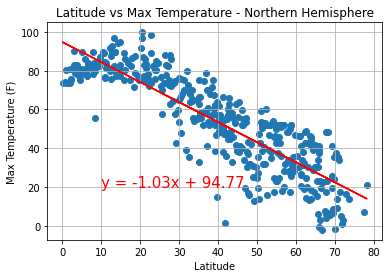

In [18]:
#x and y values
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#showing the equation on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

#printing out the r squared value
print(f"The r-squared is: {rvalue**2}")

#labels and grid
plt.title("Latitude vs Max Temperature - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

#saving png file
plt.savefig("output_data/png files/North Hem - City Lat vs. Max Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5212540553843821


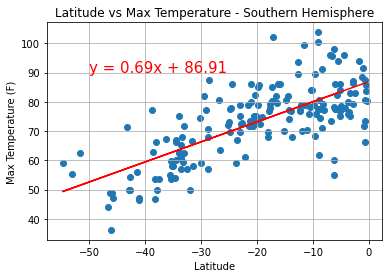

In [20]:
#x and y values
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#showing the equation on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 90),fontsize=15,color="red")

#printing out the r squared value
print(f"The r-squared is: {rvalue**2}")

#labels and grid
plt.title("Latitude vs Max Temperature - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

#saving png file
plt.savefig("output_data/png files/South Hem - City Lat vs. Max Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10792118324901925


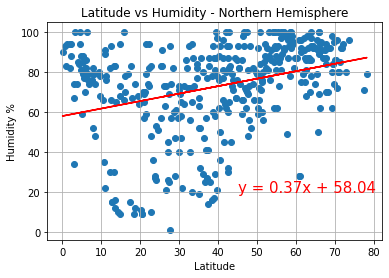

In [21]:
#x and y values
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#showing the equation on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45, 20),fontsize=15,color="red")

#printing out the r squared value
print(f"The r-squared is: {rvalue**2}")

#labels and grid
plt.title("Latitude vs Humidity - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()

#saving png file
plt.savefig("output_data/png files/North Hem - City Lat vs. Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.853608169286733e-05


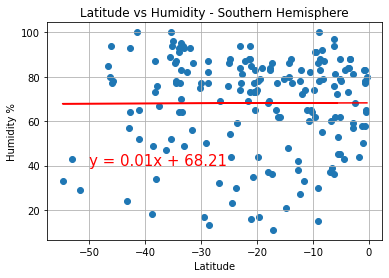

In [23]:
#x and y values
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#showing the equation on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 40),fontsize=15,color="red")

#printing out the r squared value
print(f"The r-squared is: {rvalue**2}")

#labels and grid
plt.title("Latitude vs Humidity - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()

#saving png file
plt.savefig("output_data/png files/South Hem - City Lat vs. Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04684597638532808


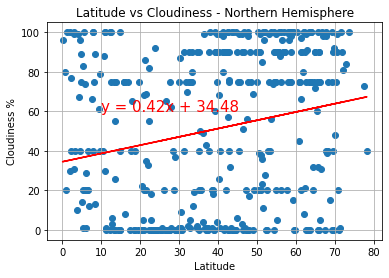

In [25]:
#x and y values
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#showing the equation on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")

#printing out the r squared value
print(f"The r-squared is: {rvalue**2}")

#labels and grid
plt.title("Latitude vs Cloudiness - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()

#saving png file
plt.savefig("output_data/png files/North Hem - City Lat vs. Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0004674091052709697


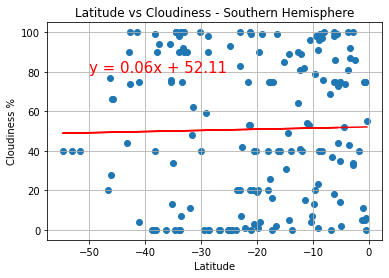

In [28]:
#x and y values
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#showing the equation on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 80),fontsize=15,color="red")

#printing out the r squared value
print(f"The r-squared is: {rvalue**2}")

#labels and grid
plt.title("Latitude vs Cloudiness - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()

#saving png file
plt.savefig("output_data/png files/South Hem - City Lat vs. Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.022685720852677695


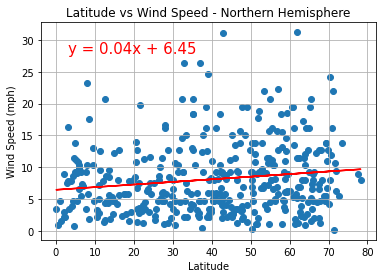

In [32]:
#x and y values
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#showing the equation on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3, 28),fontsize=15,color="red")

#printing out the r squared value
print(f"The r-squared is: {rvalue**2}")

#labels and grid
plt.title("Latitude vs Wind Speed - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

#saving png file
plt.savefig("output_data/png files/North Hem - City Lat vs. Wind Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0934726567692128


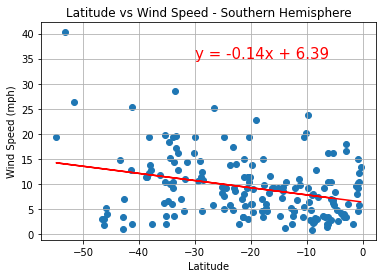

In [34]:
#x and y values
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#showing the equation on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 35),fontsize=15,color="red")

#printing out the r squared value
print(f"The r-squared is: {rvalue**2}")

#labels and grid
plt.title("Latitude vs Wind Speed - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

#saving png file
plt.savefig("output_data/png files/South Hem - City Lat vs. Wind Speed.png")